# SentinelNet: AI-Powered Network Intrusion Detection System (NIDS)

##  Project Overview
SentinelNet is an AI-powered Network Intrusion Detection System (NIDS) designed to detect malicious network traffic using supervised and unsupervised ML models.

## MILESTONE - 1

### Week 1: Project Initialization and Dataset Acquisition

<b>Step - 1 : Define project goals and expected outcomes</b>

<b>Project Goal:</b>
Develop an AI-powered Network Intrusion Detection System (NIDS) to identify malicious network traffic and cyberattacks in real time using machine learning.

<b>Expected Outcomes:</b>

Understand network traffic data and attack types.

Apply machine learning models (Random Forest, SVM, Logistic Regression) to detect intrusions.

Perform feature engineering and select important features.

Detect anomalies and generate alerts for suspicious activity.

Prepare a clear report and presentation of results.

<b>Step - 2 : Download and explore the CICIDS2017 dataset</b>


The dataset used in this project is **CICIDS2017**, obtained from the official source of the Canadian Institute for Cybersecurity.  
Dataset: https://www.unb.ca/cic/datasets/ids-2017.html


<b>Importing necessary libraries</b>

In [1]:
import pandas as pd  #Importing pandas library for data handling and analysis

In [2]:
#Loading the dataset into a pandas DataFrame 
df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv") 

Note : Selected the Wednesday dataset as it contains a balanced mix of normal and multiple attack types, unlike other datasets.


In [3]:
# Displaying the first few rows to get a quick look at the data structure
# This helps us understand what kind of features and labels the dataset contains
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<b>Step - 3 : Understand dataset structure and attack types</b>

In [4]:
df.shape #Checking the number of rows and columns in the dataset

(692703, 79)

In [5]:
df.columns #Displays all the features present in the dataset

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
# Checking column data types and non-null values
# Helps identify categorical, numerical, and missing data for preprocessing steps
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul


<b>Step - 4 : Perform basic statistics and data validation.</b>

In [7]:
# Viewing basic statistics of numeric columns like mean, std, min, max
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


### Week - 2 : Data Cleaning and Preprocessing</b>

<b>Step - 1 : Handle missing values, duplicates, and irrelevant features</b>

In [8]:
df.isnull().sum() # Identifying missing values in each column
print("Total Null Values : ", df.isnull().sum().sum())

Total Null Values :  1008


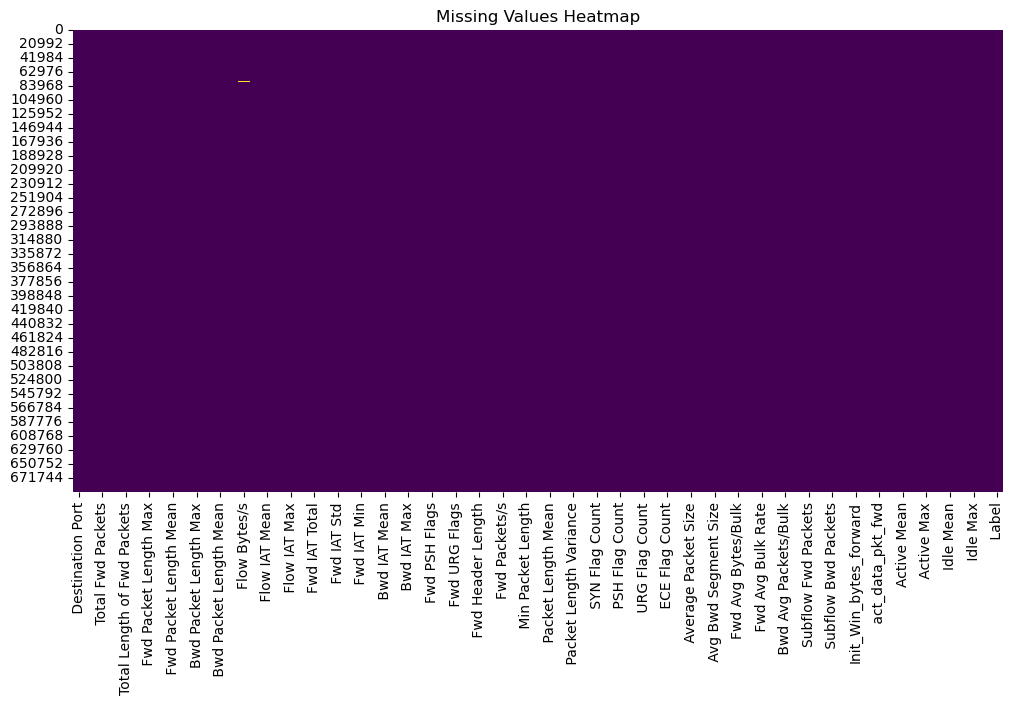

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize null values with heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Before removing null values, the heatmap showed missing or incomplete correlations in some features.

In [10]:
# Drop rows containing any null values
df_cleaned = df.dropna()

# Check if null values are removed
print(df_cleaned.isnull().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [11]:
# After Droping the null values, reverifying is there any null values 
print("Total Null Values : ", df_cleaned.isnull().sum().sum())

Total Null Values :  0


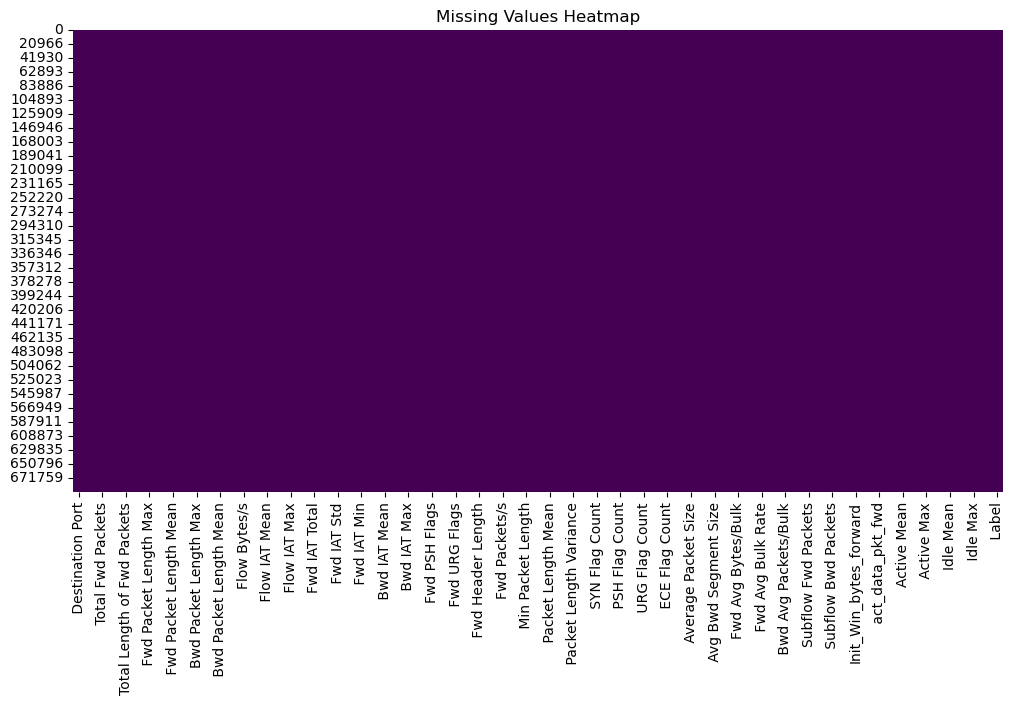

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize null values with heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

After dropping nulls, the correlations became complete and more reliable for analysis.

In [13]:
# remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

In [14]:
print(df['Label'].unique()) #Displaying all unique labels to understand the different attack categories present in the dataset

['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [15]:
print(df.duplicated().sum()) #Checking if duplicate rows exist in the dataset

81909


In [16]:
df.shape

(692703, 79)

In [17]:
df = df.drop_duplicates() #Removing duplicate rows to maintain unique, high-quality data samples

In [18]:
print(df.duplicated().sum())

0


In [19]:
df.shape

(610794, 79)

In [20]:
# Dropping irrelevant flow-related features that contain zero or near-constant values
df.columns = df.columns.str.strip()
irrelevant_cols = [
    'Flow Bytes/s', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'
] # These columns do not contribute useful information for intrusion detection in this project
df = df.drop(columns=irrelevant_cols)

In [21]:
df.shape #After droping the irrelevant features, checking number of rows and cols

(610794, 72)

In [22]:
#Saving Cleaned Data
df.to_csv("Wednesday_Cleaned.csv", index=False)

<b>Step - 2 : Convert categorical features using encoding techniques.</b>

In [23]:
# Separating dataset columns into categorical and numerical features for preprocessing in SentiNet AI

categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64','float64']).columns

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)


Categorical: Index(['Label'], dtype='object')
Numerical: Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Packets/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Varianc

In [24]:
# Encoding the categorical target column 'Label' into numeric values using LabelEncoder for model training in SentiNet AI
# Encoding is necessary because most ML algorithms require numeric input, so categories need to be converted to numbers
# After encoding, each class in 'Label' is represented by a unique integer

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() #Encodes according to the alphabetical order
df['Label'] = le.fit_transform(df['Label'])
print(df['Label'].unique())


[0 4 3 2 1 5]


<b>Step - 3 : Normalize or standardize numerical features.</b>

In [25]:
import numpy as np

# Replace inf/-inf with NaN
df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)

# Optionally drop rows with NaN
df[numerical_features] = df[numerical_features].dropna()


In [26]:
print("Before scaling:")
print("Mean:", df['Flow Duration'].mean(), "Std:", df['Flow Duration'].std())

Before scaling:
Mean: 31767575.876694534 Std: 44221306.54361563


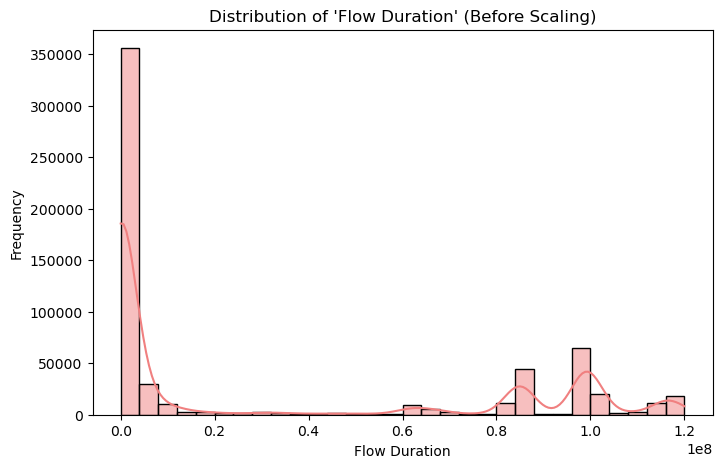

In [27]:
# Example: Visualize 'Flow Duration' before scaling
plt.figure(figsize=(8,5))
sns.histplot(df['Flow Duration'], bins=30, kde=True, color='lightcoral')
plt.title("Distribution of 'Flow Duration' (Before Scaling)")
plt.xlabel("Flow Duration")
plt.ylabel("Frequency")
plt.show()


In [28]:
df.columns = df.columns.str.strip()

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Numerical features have been standardized.")


Numerical features have been standardized.


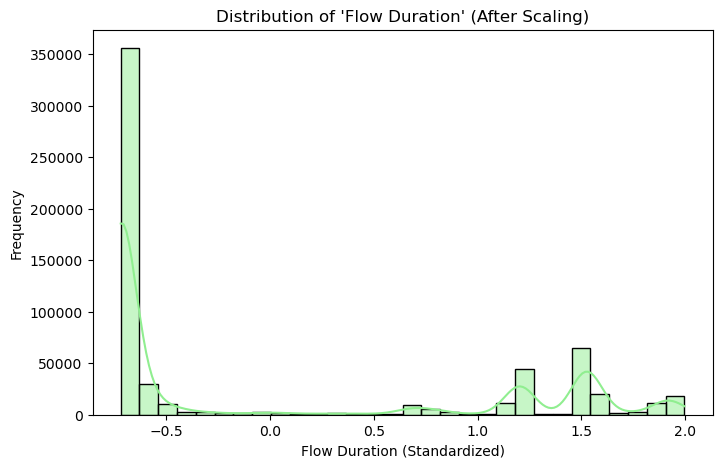

In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical feature
scaler = StandardScaler()
df['Flow Duration_scaled'] = scaler.fit_transform(df[['Flow Duration']])

# Plot the scaled feature
plt.figure(figsize=(8,5))
sns.histplot(df['Flow Duration_scaled'], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of 'Flow Duration' (After Scaling)")
plt.xlabel("Flow Duration (Standardized)")
plt.ylabel("Frequency")
plt.show()


After standardizing, all numerical features have a mean close to 0 and a standard deviation of 1, ensuring they are on the same scale for better model performance.

In [30]:
print("After scaling:")
print("Mean:", df['Flow Duration_scaled'].mean(), "Std:", df['Flow Duration_scaled'].std())

After scaling:
Mean: 3.054035333197655e-17 Std: 1.000000819012542


<b>Step - 4 : Split the dataset into training and testing sets.</b>

In [31]:
from sklearn.model_selection import train_test_split
df.columns = df.columns.str.strip()

X = df.drop('Label', axis=1)  # Features
y = df['Label']               # Target variable

# Split data: 80% training, 20% testing, with reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                     
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (488635, 72)
Testing set size: (122159, 72)
